In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical


In [2]:
def load_images(folder):
  train_data = []
  for label in os.listdir(folder):
    print(label, " Started!")
    path = folder+'/'+label
    for img in os.listdir(path):
      img = cv2.imread(path+'/'+img, cv2.IMREAD_GRAYSCALE)
      new_img = cv2.resize(img, (100, 100))
      if new_img is not None:
        train_data.append([new_img, label])
    print(label, " ended!")
  return train_data


In [3]:
train_dir = 'data/train'
val_dir = 'data/test'

train_data = load_images(train_dir)
test_data = load_images(val_dir)


0  Started!
0  ended!
1  Started!
1  ended!
2  Started!
2  ended!
3  Started!
3  ended!
4  Started!
4  ended!
5  Started!
5  ended!
6  Started!
6  ended!
7  Started!
7  ended!
8  Started!
8  ended!
9  Started!
9  ended!
a  Started!
a  ended!
b  Started!
b  ended!
c  Started!
c  ended!
d  Started!
d  ended!
e  Started!
e  ended!
f  Started!
f  ended!
g  Started!
g  ended!
h  Started!
h  ended!
i  Started!
i  ended!
j  Started!
j  ended!
k  Started!
k  ended!
l  Started!
l  ended!
m  Started!
m  ended!
n  Started!
n  ended!
o  Started!
o  ended!
p  Started!
p  ended!
q  Started!
q  ended!
r  Started!
r  ended!
s  Started!
s  ended!
t  Started!
t  ended!
u  Started!
u  ended!
v  Started!
v  ended!
w  Started!
w  ended!
x  Started!
x  ended!
y  Started!
y  ended!
z  Started!
z  ended!
0  Started!
0  ended!
1  Started!
1  ended!
2  Started!
2  ended!
3  Started!
3  ended!
4  Started!
4  ended!
5  Started!
5  ended!
6  Started!
6  ended!
7  Started!
7  ended!
8  Started!
8  ended!
9  Started

In [4]:
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

In [5]:
for feature, label in train_data:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in test_data:
  test_images.append(feature)
  test_labels.append(label)


In [6]:
train_images=np.array(train_images)
test_images=np.array(test_images)

In [7]:
train_images=train_images.reshape((-1,100,100,1))
test_images=test_images.reshape((-1,100,100,1))

In [8]:
train_images.shape
# test_images.shape


(28800, 100, 100, 1)

In [9]:
train_images= train_images.astype('float32')
test_images = test_images.astype('float32')

train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
le = LabelEncoder()
le.fit_transform(train_labels)
le.fit_transform(test_labels)
train_labels_label_encoded = le.transform(train_labels)
test_labels_label_encoded = le.transform(test_labels)

In [11]:
test_labels_label_encoded


array([ 0,  0,  0, ..., 35, 35, 35])

In [12]:
train_labels_one_hot = to_categorical(train_labels_label_encoded)
test_labels_one_hot = to_categorical(test_labels_label_encoded)


In [13]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ',
      train_labels_one_hot[0])
print(test_labels_one_hot.shape)


Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(7236, 36)


In [14]:
input_shape=(100,100,1)
n_classes=36

In [15]:
def create_model():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same',
              activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    return model


In [16]:
model = create_model()
batch_size = 256
epochs = 10
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
history = model.fit(train_images, train_labels_one_hot, batch_size=batch_size,
                    epochs=epochs, verbose=1, validation_data=(test_images, test_labels_one_hot))
model.evaluate(test_images, test_labels_one_hot)


Epoch 1/10
113/113 [==============================] - 1084s 10s/step - loss: 1.1639 - accuracy: 0.6680 - val_loss: 0.0761 - val_accuracy: 0.9808
Epoch 2/10
113/113 [==============================] - 970s 9s/step - loss: 0.1403 - accuracy: 0.9544 - val_loss: 0.0170 - val_accuracy: 0.9960
Epoch 3/10
113/113 [==============================] - 1030s 9s/step - loss: 0.0675 - accuracy: 0.9774 - val_loss: 0.0063 - val_accuracy: 0.9982
Epoch 4/10
113/113 [==============================] - 1043s 9s/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0052 - val_accuracy: 0.9979
Epoch 5/10
113/113 [==============================] - 1006s 9s/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 6/10
113/113 [==============================] - 975s 9s/step - loss: 0.0300 - accuracy: 0.9896 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 7/10
113/113 [==============================] - 941s 8s/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0080 - val_accuracy: 0

[0.0007009149994701147, 0.9998617768287659]

In [18]:
# model_json = model.to_json()
# with open("model_new.json", "w") as json_file:
#     json_file.write(model_json)
# print('Model Saved')
# model.save_weights('model_updated.h5')
# print('Weights saved')
# model.save('model.h5')

Model Saved
Weights saved


c:\Users\anjuv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py:2980: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizing loss

Text(0.5, 1.0, 'Loss Curves')

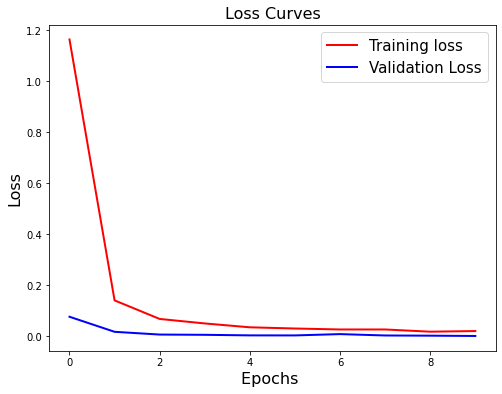

In [19]:
# plt.figure(figsize=[8, 6])
# plt.plot(history.history['loss'], 'r', linewidth=2.0)
# plt.plot(history.history['val_loss'], 'b', linewidth=2.0)
# plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
# plt.xlabel('Epochs ', fontsize=16)
# plt.ylabel('Loss', fontsize=16)
# plt.title('Loss Curves', fontsize=16)


Visualizing accuracy

Text(0.5, 1.0, 'Accuracy Curves')

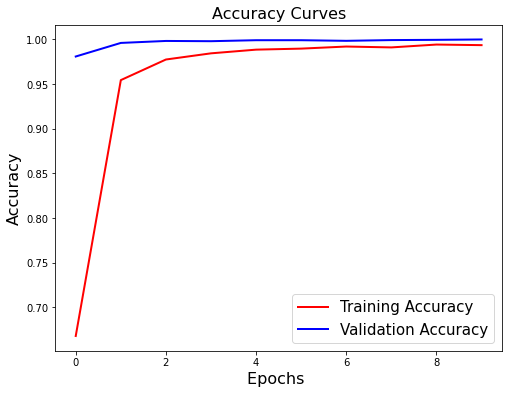

In [20]:
# plt.figure(figsize=[8, 6])
# plt.plot(history.history['accuracy'], 'r', linewidth=2.0)
# plt.plot(history.history['val_accuracy'], 'b', linewidth=2.0)
# plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
# plt.xlabel('Epochs ', fontsize=16)
# plt.ylabel('Accuracy', fontsize=16)
# plt.title('Accuracy Curves', fontsize=16)

In [21]:
# import pickle

# with open('model.pkl', 'wb') as files:
#     pickle.dump(model, files)


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
c_m = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 17))
plt.title("Confusion Matrix for K Nearest Neighbour")
df_cm = pd.DataFrame(c_m)
sbn.heatmap(df_cm, annot=True)

In [ ]:
plt.savefig('confusion.png')